In [44]:
import pandas as pd
import numpy as np

In [2]:
prices = pd.read_parquet('../data/fund_prices.parq')

In [3]:
prices.head()

,fundName,fundSeries,installmentValue,bloombergCode,fecha
0,CAPITALISA-ACC,A,343.7506,BCHCAPT CI,2015-01-01
1,CAPITALISA-ACC,B,457.6202,BCHCACB CI,2015-01-01
2,CAPITALISA-ACC,C,777.8586,BCHCACC CI,2015-01-01
3,CAPITALISA-ACC,S,1000.0000,BCHCACS CI,2015-01-01
4,HORIZONTE,A,32368.2689,BCHEMPR CI,2015-01-01


In [4]:
data.head()

(5960032, 5)

In [14]:
monthly = prices.groupby([pd.Grouper(key='fecha', freq='1M'), 'fundName']).sum()
monthly.head()

installmentValue
fecha      fundName                             
2015-01-31 A. CHILE CALIFICADO       220139.6868
           AC EMERGENTES             204310.0432
           ACCIONES CHILE            189580.4051
           ACCIONES CHILENAS         438913.7454
           ACCIONES LATAM            170119.3758

In [136]:
monthly_prices = prices.pivot_table(
    values='installmentValue',
    index=pd.Grouper(key='fecha', freq='1M'),
    columns=['fundName', 'fundSeries'],
    aggfunc=sum,
    fill_value=0
)

In [137]:
monthly_prices.head()

fundName   \tEA CONSERVADOR                      A. CHILE CALIFICADO       \
fundSeries                A B-APV/APVC  CUI    D                   A   AC   
fecha                                                                       
2015-01-31              0.0        0.0  0.0  0.0               31000  0.0   
2015-02-28              0.0        0.0  0.0  0.0               28000  0.0   
2015-03-31              0.0        0.0  0.0  0.0               31000  0.0   
2015-04-30              0.0        0.0  0.0  0.0               30000  0.0   
2015-05-31              0.0        0.0  0.0  0.0               31000  0.0   

fundName                                     ... ZURICH USA      ZURICH VALOR  \
fundSeries AC-APV      B      C           D  ...          P    R            A   
fecha                                        ...                                
2015-01-31    0.0  31000  31000  23440.7971  ...        0.0  0.0          0.0   
2015-02-28    0.0  28000  28000  21918.0452  ...        0.0  0.0          0.0   
2015-03-31    0.0  31000  31000  24165.6359  ...        0.0  0.0          0.0   
2015-04-30    0.0  30000  30000  24009.4936  ...        0.0  0.0          0.0   
2015-05-31    0.0  31000  31000  24877.7178  ...        0.0  0.0          0.0   

fundName                                         
fundSeries    B    C    D E-APV H-APV    I    P  
fecha                                            
2015-01-31  0.0  0.0  0.0   0.0   0.0  0.0  0.0  
2015-02-28  0.0  0.0  0.0   0.0   0.0  0.0  0.0  
2015-03-31  0.0  0.0  0.0   0.0   0.0  0.0  0.0  
2015-04-30  0.0  0.0  0.0   0.0   0.0  0.0  0.0  
2015-05-31  0.0  0.0  0.0   0.0   0.0  0.0  0.0  

[5 rows x 4824 columns]

In [138]:
monthly_returns = monthly_prices.pct_change()
monthly_returns.replace([-np.inf, np.inf], np.nan, inplace=True)
monthly_returns.fillna(0, inplace=True)
monthly_returns.head()

fundName   \tEA CONSERVADOR                      A. CHILE CALIFICADO       \
fundSeries                A B-APV/APVC  CUI    D                   A   AC   
fecha                                                                       
2015-01-31              0.0        0.0  0.0  0.0            0.000000  0.0   
2015-02-28              0.0        0.0  0.0  0.0           -0.096774  0.0   
2015-03-31              0.0        0.0  0.0  0.0            0.107143  0.0   
2015-04-30              0.0        0.0  0.0  0.0           -0.032258  0.0   
2015-05-31              0.0        0.0  0.0  0.0            0.033333  0.0   

fundName                                         ... ZURICH USA       \
fundSeries AC-APV         B         C         D  ...          P    R   
fecha                                            ...                   
2015-01-31    0.0  0.000000  0.000000  0.000000  ...        0.0  0.0   
2015-02-28    0.0 -0.096774 -0.096774 -0.064962  ...        0.0  0.0   
2015-03-31    0.0  0.107143  0.107143  0.102545  ...        0.0  0.0   
2015-04-30    0.0 -0.032258 -0.032258 -0.006461  ...        0.0  0.0   
2015-05-31    0.0  0.033333  0.033333  0.036162  ...        0.0  0.0   

fundName   ZURICH VALOR                                       
fundSeries            A    B    C    D E-APV H-APV    I    P  
fecha                                                         
2015-01-31          0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  
2015-02-28          0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  
2015-03-31          0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  
2015-04-30          0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  
2015-05-31          0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  

[5 rows x 4824 columns]

In [33]:
monthly_returns.T.to_csv('monthly_returns.csv')

In [76]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
from collections import defaultdict

In [116]:
cl = AgglomerativeClustering(
    n_clusters=18,
    affinity='euclidean',
    linkage='ward',
    compute_distances=True
)
cl.fit(monthly_returns.T)

AgglomerativeClustering(compute_distances=True, n_clusters=18)

In [117]:
d = defaultdict(int)
for l in cl.labels_:
    d[l] += 1
d

defaultdict(int,
            {0: 4694,
             5: 13,
             16: 15,
             8: 2,
             1: 34,
             15: 1,
             6: 4,
             3: 3,
             14: 1,
             9: 1,
             2: 25,
             12: 7,
             10: 2,
             7: 15,
             11: 1,
             4: 2,
             13: 3,
             17: 1})

In [134]:
cl = KMeans(n_clusters=18)
cl.fit(monthly_returns.T)

KMeans(n_clusters=18)

In [119]:
d = defaultdict(int)
for l in cl.labels_:
    d[l] += 1
d

defaultdict(int,
            {0: 4735,
             15: 1,
             8: 2,
             1: 1,
             13: 1,
             17: 3,
             12: 1,
             7: 23,
             3: 1,
             6: 25,
             4: 7,
             11: 2,
             10: 14,
             9: 1,
             14: 1,
             2: 2,
             5: 3,
             16: 1})

In [120]:
cl = DBSCAN(eps=2)
cl.fit(monthly_returns.T)

DBSCAN(eps=2)

In [121]:
d = defaultdict(int)
for l in cl.labels_:
    d[l] += 1
d

defaultdict(int,
            {0: 4494,
             1: 5,
             2: 11,
             -1: 166,
             3: 5,
             4: 15,
             5: 6,
             6: 5,
             7: 13,
             8: 11,
             9: 7,
             10: 13,
             11: 22,
             12: 19,
             13: 7,
             14: 5,
             15: 8,
             16: 6,
             17: 6})

In [122]:
funds = pd.read_parquet('../data/fund_data.parq')
funds.head()

,fundRUN,fundName,fundSeries,bloombergCode,APV,aafmCategory,svsCategory,svsCategoryId,currency,fixedRemuneration,variableRemuneration,investmentCommission,rescuedCommission
0,8001-2,CAPITALISA-ACC,A,BCHCAPT CI,NO,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,346510.0,0.0,0.0,0.0
1,8001-2,CAPITALISA-ACC,B,BCHCACB CI,SI,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,2899.0,0.0,0.0,0.0
2,8001-2,CAPITALISA-ACC,C,BCHCACC CI,NO,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,14858.0,0.0,0.0,0.0
3,8001-2,CAPITALISA-ACC,S,BCHCACS CI,NO,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,0.0,0.0,0.0,0.0
4,8023-3,HORIZONTE,A,BCHEMPR CI,NO,"Fondos de Deuda > 365 Dias Nacional, Inversion...",FM DE INV.EN INST.DE DEUDA DE MEDIANO Y LARGO ...,3.0,P,2347098.0,0.0,0.0,5908.0


In [128]:
funds.shape

(4351557, 13)

In [124]:
funds['aafmCategory'].unique()

array(['Accionario Nacional Large CAP',
       'Fondos de Deuda > 365 Dias Nacional, Inversion en UF > 5 años',
       'Fondos de Deuda < 90 Dias Nacional',
       'Fondos de Deuda > 365 Dias Nacional, Inversión en UF < 3 años',
       'Fondos de Deuda < 365 Dias Nacional', 'Accionario Emergente',
       None, 'Accionario Nacional Otros', 'Accionario EEUU',
       'Accionario Desarrollado',
       'Fondos de Deuda > 365 Dias Nacional, Inversión en UF > 3 años',
       'Fondos de Deuda > 365 Dias Nacional, Inversion UF > 3 años y =<5',
       'Fondos de Deuda < 365 Dias Nacional en UF',
       'Accionario Europa Desarrollado', 'Accionario Asia Pacifico',
       'Fondos de Deuda > 365 Dias Nacional, Inversión en Pesos',
       'Accionario America Latina',
       'Fondos de Deuda < 90 Dias Internacional, Dolar',
       'Fondos de Deuda > 365 Dias Internacional, Mercados Emergentes',
       'Fondos de Deuda > 365 Dias Internacional, Mercados Internacionales',
       'Fondos de Deuda < 90 D

In [131]:
funds[['fundName', 'aafmCategory']].drop_duplicates().groupby('aafmCategory').count()

,fundName
aafmCategory,
Accionario America Latina,20
Accionario Asia Emergente,13
Accionario Asia Pacifico,1
Accionario Brasil,12
Accionario Desarrollado,18
Accionario EEUU,20
Accionario Emergente,22
Accionario Europa Desarrollado,13
Accionario Europa Emergente,2


In [132]:
prices.pivot_table(
    values='installmentValue',
    index=pd.Grouper(key='fecha', freq='1M'),
    columns=['fundName'],
    aggfunc=sum,
    fill_value=0
).shape

(74, 723)

In [133]:
funds[['fundName', 'aafmCategory']].drop_duplicates().groupby('aafmCategory').count().sum()

fundName    736
dtype: int64

In [160]:
dist = []
for k in range(2, 19):
    cl = KMeans(n_clusters=k)
    cl.fit(monthly_returns.T)
    dist.append(cl.inertia_)

In [161]:
res = pd.DataFrame({'n_clusters': list(range(2, 19)), 'sum_sqrd_dist': dist})
res['change'] = res['sum_sqrd_dist'].pct_change()

In [162]:
res

,n_clusters,sum_sqrd_dist,change
0,2,63090.012653,NaN
1,3,57148.945716,-0.094168
2,4,54030.707792,-0.054563
3,5,50209.411070,-0.070725
4,6,44490.224484,-0.113907
5,7,43555.116673,-0.021018
6,8,39888.689849,-0.084179
7,9,37938.221750,-0.048898
8,10,37978.699677,0.001067
9,11,35281.807867,-0.071011


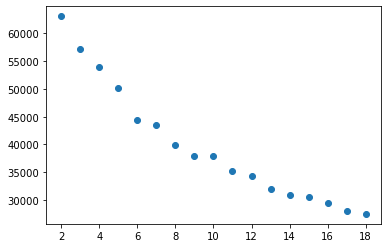

In [165]:
plt.scatter(x=res['n_clusters'], y=res['sum_sqrd_dist'])